In [38]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns

from simulation import *
from aesthetics import *
from plot import * 
prepare_plot()

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)

# How does surface articulation affect motor function?

First, we should look at the case of a simple sawtooth wave. I've done this before, but I have to search around for the function that worked well -- not too steep and not too broad, just the right amount of transition space.

In [39]:
def saw(x, a):
    """Return a sawtooth wave, specified by the position and period."""
    return 2 * (x / a - np.floor(1 / 2 + x / a))


def variable_saw(y, x, a):
    return y * (x / a - np.floor(1 / 2 + x / a))

In [43]:
this = Simulation(data_source = 'manual')
x = np.linspace(0, 2*np.pi, 60)
this.unbound = saw(x, 2*np.pi)
this.bound   = saw(x + np.pi, 2*np.pi)
this.C_intersurface = 10 ** 6     # per mole per second
this.offset_factor = 5.7          # kcal per mol
this.catalytic_rate = 312         # per second
this.cSubstrate = 2.5 * 10 ** -3
this.simulate(user_energies=True)

Using manual parameters, specify C, offset, and catalytic rate.


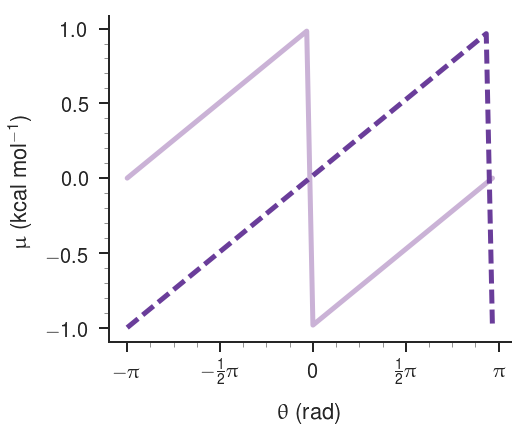

In [44]:
plot_energy(this)

C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +2.50e-03  M         
dt                        +1.00e-12  second    
-------------------------
Intrasurface flux         -1.92e-01  cycle second**-1
Peak                      +1.94e-01  cycle second**-1


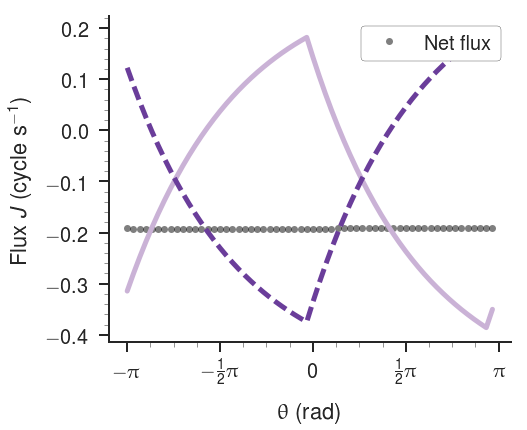

In [45]:
plot_flux(this)

# Now let's make a toothy ratchet

Let's try to put 50 small sawtooths together...

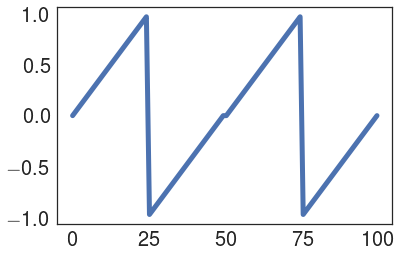

In [57]:
x = np.linspace(0, 2*np.pi, 50)
toothy = np.concatenate(( saw(x, 2*np.pi), saw(x, 2*np.pi) ))
plt.plot(toothy)

In [121]:
toothy = []
for iteration in range(5):
    curve = [iteration + i for i in saw(x, 2*np.pi)]
    toothy.append(curve)
   
apo = [item for sublist in toothy for item in sublist]

toothy = []
for iteration in range(5):
    curve = [iteration + i for i in saw(x + np.pi - 0.5, 2*np.pi)]
    toothy.append(curve)

bound = [item for sublist in toothy for item in sublist]

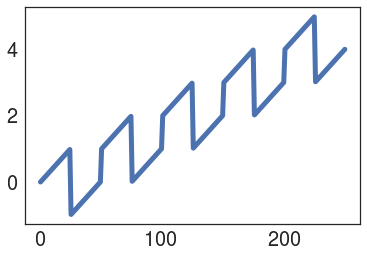

In [122]:
plt.plot(apo)

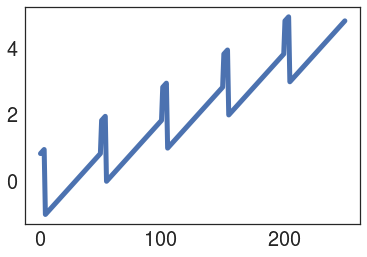

In [123]:
plt.plot(bound)

In [ ]:
this = Simulation(data_source = 'manual')
this.unbound = articulated
this.bound   = 
this.C_intersurface = 10 ** 6     # per mole per second
this.offset_factor = 5.7          # kcal per mol
this.catalytic_rate = 312         # per second
this.cSubstrate = 2.5 * 10 ** -3
this.simulate(user_energies=True)